# Class Project - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [ ]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [ ]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20 Points] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [ ]:
#DATASET_PATH = os.path.join("datasets", "housing")
#def load_data(path):
    #heartdisease = os.path.join(housing_path, "heartdisease.csv")
    #return pd.read_csv(heartdisease.csv)
    #googlecolab_only
    #return pd.read_csv(io.BytesIO(uploaded['heartdisease.csv']))

In [ ]:
#googlecolab only
#from google.colab import files
#uploaded = files.upload()
#import io

heartdisease = pd.read_csv("heartdisease.csv")
#load_data(DATASET_PATH) # we load the pandas dataframe
 # show the first few elements of the dataframe
               # typically this is the first thing you do
               # to see how the dataframe looks like

### Question 1.1 Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method to display some of the rows so we can visualize the types of data fields we'll be working with, then use the describe method, along with any additional methods you'd like to call to better help you understand what you're working with and what issues you might face. 

In [ ]:
heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [ ]:
heartdisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
heartdisease.isnull().values.any()

False

### Question 1.2 Discuss your data preprocessing strategy. Are their any datafield types that are problemmatic and why? Will there be any null values you will have to impute and how do you intend to do so? Finally, for your numeric and categorical features, what if any, additional preprocessing steps will you take on those data elements?

  We begin by observing the head() output of our dataset to see what type of variables we're looking at.

  A quick search through the data through a function call heartdisease.isnull().values.any() reveals that this dataframe actually doesn't contain null values, so imputation isn't a problem at all.

  At first glance, it appears that there are some numerical columns that actually exist as categorical features, such as sex, chestpain, exang, slope, and thal. For our purposes, this is fine, but we must keep in mind that we can therefore not impute these variables with imputation methods such as mean or median. If there are null values, we were likely going to use methods such as mode and manual entry (constant), but as there are no NA or NULL values that need imputation, this is an unnecessary consideration.

  Additional preprocessing steps for our data is likely going to be the conversion of the sick column from (TRUE, FALSE) representation of boolean values to (1,0) representations in numerical form for consistency with the rest of the dataframe we have. Furthermore, OneHotEncoder and StandardScaler processing methods are going to be used on our categorical and numerical values respectively. Reasoning behind these pre-processing methods will be explained later, but the hope is that it will improve the accuracy of our predictive classification models.

### Question 1.3  Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe.

In [ ]:
heartdisease["sick"] = heartdisease["sick"].astype(int)
heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### Question 1.4 Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbaa6b38e48>,
      dtype=object)

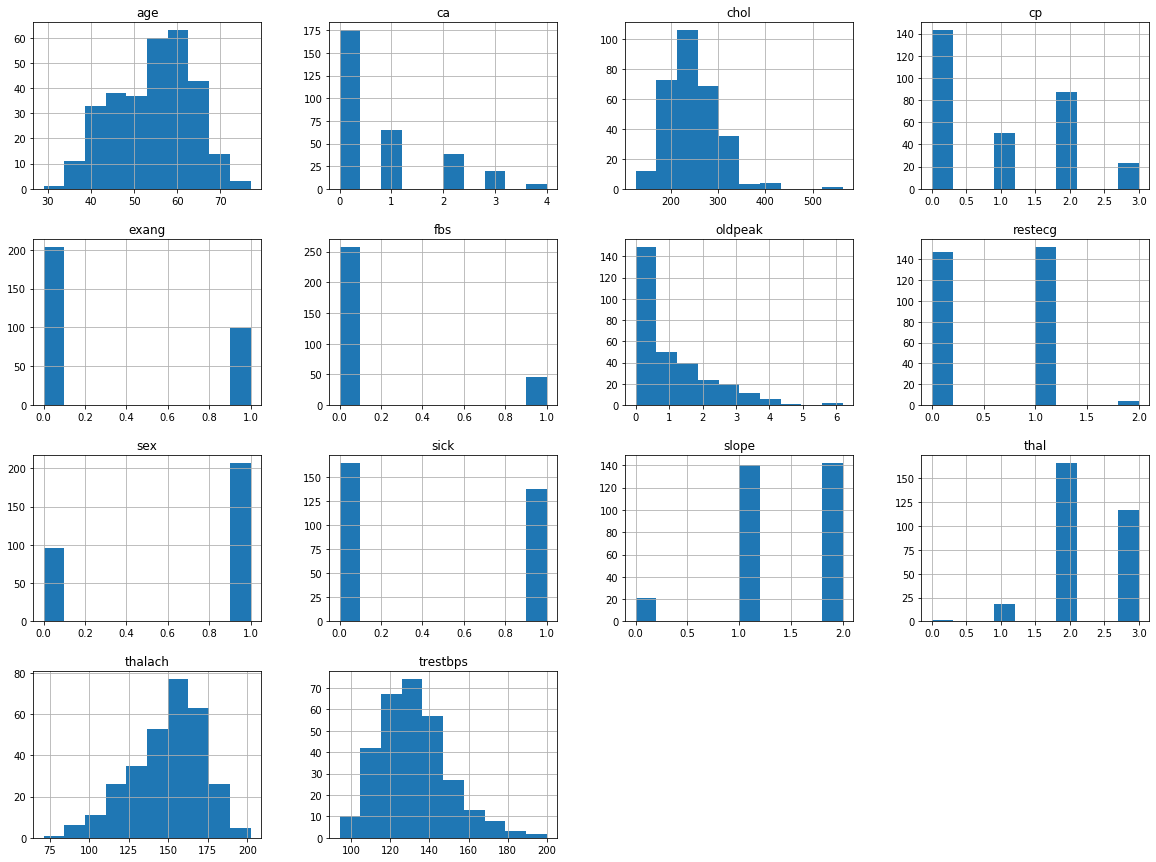

In [ ]:
heartdisease.hist(figsize=(20,15))

Heart disease diagnosis, measured by the sick column, shows a fairly even split between healthy and non-healthy individuals with a majority towards healthy (not sick). Our histogram reveals binary variable distribution

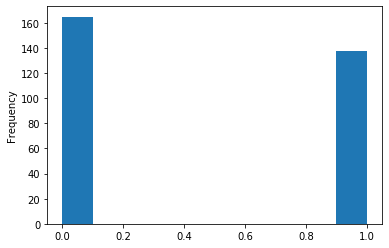

In [ ]:
heartdisease["sick"].plot.hist()

The sex distribution between men and women shows a binary distribution that tends towards a majority male population. This may cause some inaccuracy in our data if it's expanded and grows to encompass a more even population distribution.

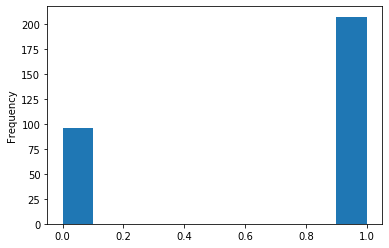

In [ ]:
heartdisease["sex"].plot.hist()

Our age distribution is non-binary and seems to follow a more positive gradient that peaks somewhere within the age range of late 50s and early 60s.

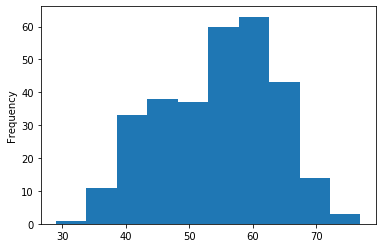

In [ ]:
heartdisease["age"].plot.hist()

Our trestbps distribution is non-binary and seems to follow a more negative gradient decreases from about 130 and onwards. We can make some assumptions about patient health from this heuristic by comparing it to a baseline "healthy" blood pressure.

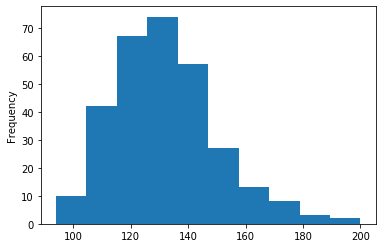

In [ ]:
heartdisease["trestbps"].plot.hist()

Our chol distribution is non-binary and seems to follow a more normalized gradient which decreases from about 250 and onwards. Interestingly, this follows a very similar trend to our trestbps distribution.

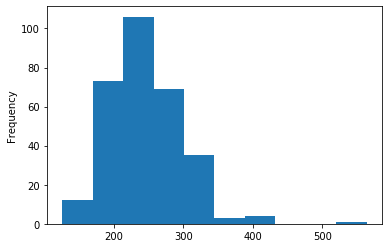

In [ ]:
heartdisease["chol"].plot.hist()

### Question 1.5 We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

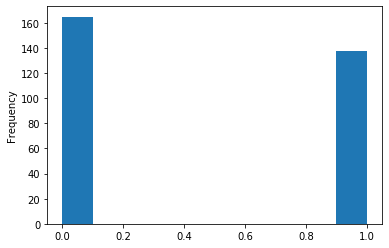

In [ ]:
heartdisease["sick"].plot.hist()

In [ ]:
len(heartdisease[heartdisease["sick"] == 0])
#Counting Non-Sick

165

In [ ]:
len(heartdisease[heartdisease["sick"] == 1])
#Counting Sick

138

In [ ]:
proportionNonSick = 165/303
proportionNonSick

0.5445544554455446

In [ ]:
proportionSick = 138/303
proportionSick

0.45544554455445546

There are about 168 non-sick and individuals and 138 sick individuals in our dataframe. There are not exactly equal amounts of sick and healthy individuals in our dataset, so we will not have the best possible balanced dataset needed to create our classification model. The values are, however, close enough to one another that there won't be too much of an issue from this imbalance. Although, the results of our classification might be geared more towards declaring individuals non-sick simply because we have more data in that direction. The differences between a 50/50 even split of non-sick/sick individuals and a ~55/45 split is a problem that we can leave to our classifier model to solve.


### Question  1.6 Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

Because we're using a dataset in order to train a classifier to be able ot make decisions off a dataset, artificial balancing to introduce new or cull old data introduces new biases into our dataset. Because new data is not actually collected in order to balance dataset, but rather old data is being manipulated in someway, a classifier might observe unacceptable behavior because of how the dataset was manipulated. Some methods of manipulation might include repetition of row entries in order to get more sick individuals in our dataset or randomly removing non-sick row entries from our data set until they match the amount of sick-designated entries. 

Repetition of row entries or synthetic data generation may emphasize feature characteristics based on the way we generate new data. For instance, repeating columns may give greater weight to feature characteristics observed in that repeated row, whatever they might be. When splitting into sample and testing sets, overfitting might be observed as well as the model will recognize the same repeated entries, having been incorporated by synthesizing data, and attribute more classifications towards dealing with that specific training data frame. In other dataset of naturally collected data, the model trained on synthetic data will not be able to perform as well as it possibly can.

Culling entries into a balance is achieved may reduce the significance of features that do not get enough representation in the dataframe as a result of seeing entries removed. This may cause underfitting of data in our classification testing as the lack of entries containing certain feature values prevent their application in our model to perform accurate classifications.

### Question 1.9 Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

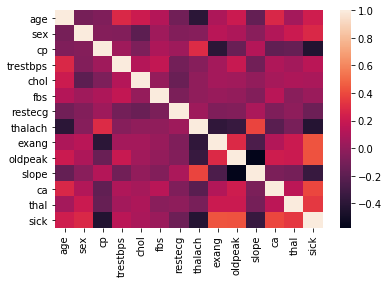

In [ ]:
sns.heatmap(heartdisease.corr())

In [ ]:
#heartdisease.corr().unstack().sort_values(ascending = False).head(20)
heartdisease.corr().unstack().sort_values(ascending = False)[14:24]

exang    sick       0.436757
sick     exang      0.436757
oldpeak  sick       0.430696
sick     oldpeak    0.430696
         ca         0.391724
ca       sick       0.391724
thalach  slope      0.386784
slope    thalach    0.386784
thal     sick       0.344029
sick     thal       0.344029
dtype: float64

In [ ]:
heartdisease.corr().unstack().sort_values(ascending = False)[186:196]

cp       exang     -0.394280
exang    cp        -0.394280
age      thalach   -0.398522
thalach  age       -0.398522
         sick      -0.421741
sick     thalach   -0.421741
         cp        -0.433798
cp       sick      -0.433798
oldpeak  slope     -0.577537
slope    oldpeak   -0.577537
dtype: float64

Most of the data itself sees little correlation with other features in the dataset. The highest correlation values seen between variables that are not matchings of the same variable range from -.578 to .436. The most interesting variable relationships we observe is between binary variables pairings that involve sick. We note that sick shares some positive correlation with exang (exercise-induced angina follows heart disease), oldpeak (a higher/deeper depression also seems to follow heart disease), and ca (more major vessels highlighted with color in flouroscopy imaging). 

Looking up the medical meaning of these variables reveals that all three of these variables sharing positive correlation with a heart disease diagnosis are indicators of some heart-related issue. This intuitively makes sense as issues related with the heart as measured by these variables can also sierve as symptoms of maladies afflicting the heart.

(Some correlation was ignored specifically in variables like cp and thalach as they were categorical variables and thus their values are meaningless in tracking correlation to a binary variable).

## [30 Points] Part 2. Prepare the Data 

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 Save the target column as a separate array and then drop it from the dataframe. 

In [ ]:
target_column = heartdisease["sick"]

In [ ]:
target_column.head()

0    0
1    0
2    0
3    0
4    0
Name: sick, dtype: int64

In [ ]:
heartdisease = heartdisease.drop(["sick"], axis = 1)
heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Question 2.2 First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(heartdisease, target_column, test_size=0.3)

In [ ]:
x_train.shape
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3


In [ ]:
x_test.shape

(91, 13)

In [ ]:
y_train.shape

(212,)

In [ ]:
y_test.shape

(91,)

### Question 2.3 Now create a pipeline to conduct any additional preparation of the data you would like. Output the resulting array to ensure it was processed correctly.

In [ ]:

#Our cat feat
#sex: (1 = male; 0 = female)
#cp: Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)
#fbs Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
#restecg: 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))
#exang: Exercise induced angina (1 = yes; 0 = no)
#slope: The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)
#thal: 1 = normal; 2 = fixed defect; 7 = reversable defect
#Sick: Indicates the presence of Heart disease (True = Disease; False = No disease)

#Our num feat
#age: Age in years
#ca: Number of major vessels (0-3) colored by flourosopy
#trestbps: Resting blood pressure (in mm Hg)
#cholserum: Cholestoral in mg/dl
#thalach: Maximum heart rate achieved
#oldpeakST: Depression induced by exercise relative to rest
heartdisease.dtypes
list(heartdisease)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

heartdisease_nums = heartdisease.drop(["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"], axis = 1)
heartdisease_cats = heartdisease.drop(["age", "ca", "trestbps", "chol", "thalach", "oldpeak"], axis = 1)

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

heartdisease_nums_tr = num_pipeline.fit_transform(heartdisease_nums)
num_features = list(heartdisease_nums)
cat_features = list(heartdisease_cats)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", OneHotEncoder(), cat_features),
    ])

heartdisease_prepared = full_pipeline.fit_transform(heartdisease)
heartdisease_prepared

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  1.        ,
         0.        ,  0.        ],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.        ,
         1.        ,  0.        ],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.        ,
         1.        ,  0.        ]])

### Question 2.4 Now create a separate, processed training data set by dividing your processed dataframe into training and testing cohorts, using the same settings as Q2.2 (REMEMBER TO USE DIFFERENT TRAINING AND TESTING VARIABLES SO AS NOT TO OVERWRITE YOUR PREVIOUS DATA). Output the resulting shapes of your training and testing samples to confirm that your split was successful, and describe what differences there are between your two training datasets.

In [ ]:
x_process_train, x_process_test, y_process_train, y_process_test = train_test_split(heartdisease_prepared, target_column, test_size=0.3)

In [ ]:
x_process_train.shape

(212, 26)

In [ ]:
x_process_test.shape

(91, 26)

In [ ]:
y_process_train.shape

(212,)

In [ ]:
y_process_test.shape

(91,)

Differences between datasets are designated by the additional preparation steps made in repsonse to Q2.3. Primary differences observed in processing done to categorical and numerical features through OneHotEncoder and StandardScaler respectively. The former converts categorical data into a more binary form to avoid mistakes involved in interpreting number categories as true numerical variables. In other words, splitting multiple categories in a single variable to represent binary ones for each category value in a categorical variable. The latter, according to the sci-kit documentation, "standardizes a dataset" of numerical values, scaling the unit variance. This makes our data take on a normal distribution which is better for classification models.

## [50 Points] Part 3. Learning Methods 

We're finally ready to actually begin classifying our data. To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Question 3.1.1 Implement a Support Vector Machine classifier on your RAW dataset. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [ ]:
# SVM Implementation
svm_model = SVC(probability = True, gamma = 'auto')
svm_model.fit(x_train, y_train)
svm_prediction = svm_model.predict(x_test)
svm_score = svm_model.predict_proba(x_test)

### Question 3.1.2 Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

Accuracy: 0.5164835164835165
Precision: 0.0
Recall: 0.0
F1: 0.0
Confusion Matrix: 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


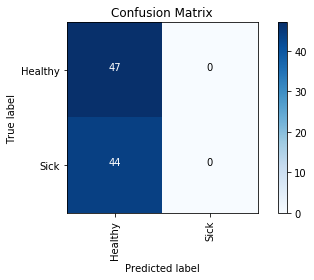

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, svm_prediction))
print("Precision:", metrics.precision_score(y_test, svm_prediction))
print("Recall:", metrics.recall_score(y_test, svm_prediction))
print("F1:", metrics.f1_score(y_test, svm_prediction))
print("Confusion Matrix: \n")
draw_confusion_matrix(y_test, svm_prediction, ['Healthy', 'Sick'])

### Question 3.1.3 Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

Accuracy: An evaluation of how well a prediction model performs when comparing computed predictions to the real results. (Simply tracks proportion of correct predictions). Best for simple problems with balanced datasets and low real-world impact, like labeling images (MNIST character classification).

Precision: Similar to accuracy, indicates the matching proportion of correct positive results (healthy in our case) over our total number of positive results (false positives and true positives); (Counts correct positive predictions to measure false positive rate). Best when false positives are an important thing to track (e.g. whether or not a phone call is made from a spam service or real person).

Recall: Similar to precision and accuracy, indicates our true positive ratio over what is potentially a combination of true positives and false negatives; (Counts correct positive predictions to measure false negative rate). Best when false negatives are a concern (e.g. misdiagnosis of an individual as a carrier of coronavirus requires methods minimizing false negatives due to risk).

F1: A mean taken between precision and recall results. It's best used when we weigh the precision and recall values equally enough that they can both be used as an indicator of accuracy; (Strikes a balance between measuring errors for false positives and negatives). Better when wrongful predictions hold greater weight, or more risky real-world decision making (e.g. predicting real-time traffic trends, as mislabeling high-density and low-density traffic is more significant than correctly predicting densities of traffic due to impact on all drivers on the road). Additionally, it's great for unbalanced dataset which are more true to imitating the real-world of data and data-related problems.

Confusion Matrix: Doesn't actually measure anything computationally since it mostly just serves as a graphic depiction of our false/true positive/negative readings. Because of this, it's always useful to get a general understanding of the other metrics.

### Question 3.1.4 Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

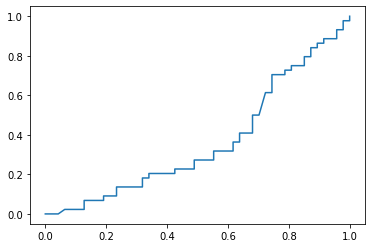

In [ ]:
fpr_svm, tpr_svm, threshholds = metrics.roc_curve(y_test, svm_score[:, 1], pos_label = 1)
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm)

An ROC curve measures our true positive rate against our false positive rate. This is primarily to see if our model would work better on a more general and globalized dataset of greater size and variation. The most important component of the ROC curve is less the curve itself and more the area under the curve. The greater it is, the better "separability" it has, meaning that correct predictions are more distinguishable than their false counterparts. 

### Question 3.1.5 Rerun, using the exact same settings, only this time use your processed data as inputs. 

In [ ]:
svm_model = SVC(probability = True, gamma = 'auto')
svm_model.fit(x_process_train, y_process_train)
svm_prediction = svm_model.predict(x_process_test)
svm_score = svm_model.predict_proba(x_process_test)

### Question 3.1.6 Report the accuracy, precision, recall, F1 Score, confusion matrix, and plot the ROC Curve of the resulting model.

Accuracy: 0.8571428571428571
Precision: 0.875
Recall: 0.813953488372093
F1: 0.8433734939759036
Confusion Matrix: 



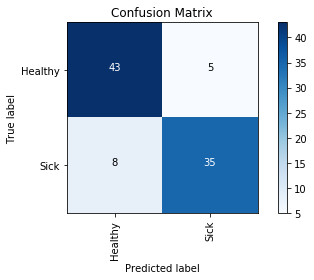

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_process_test, svm_prediction))
print("Precision:", metrics.precision_score(y_process_test, svm_prediction))
print("Recall:", metrics.recall_score(y_process_test, svm_prediction))
print("F1:", metrics.f1_score(y_process_test, svm_prediction))
print("Confusion Matrix: \n")
draw_confusion_matrix(y_process_test, svm_prediction, ['Healthy', 'Sick'])

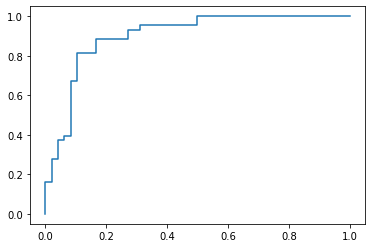

In [ ]:
fpr_svm, tpr_svm, threshholds = metrics.roc_curve(y_process_test, svm_score[:, 1], pos_label = 1)
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm)

### Question 3.1.7 Hopefully you've noticed a dramatic change in performance. Discuss why you think your new data has had such a dramatic impact. 

SVM is a classification model which benefits more from the pre-processing we did unto our dataset. Normalizing our data and expanding out our categorical variables (such that they are weighed more evenly between greater category possibilities) helps our classification model perform better than in extremely unbalanced datasets.

### Question 3.1.8 Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [ ]:
svm_model = SVC(probability = True, gamma = 'auto', kernel = 'linear')
svm_model.fit(x_process_train, y_process_train)
svm_prediction = svm_model.predict(x_process_test)
svm_score = svm_model.predict_proba(x_process_test)

Accuracy: 0.8021978021978022
Precision: 0.8205128205128205
Recall: 0.7441860465116279
F1: 0.7804878048780488
Confusion Matrix: 



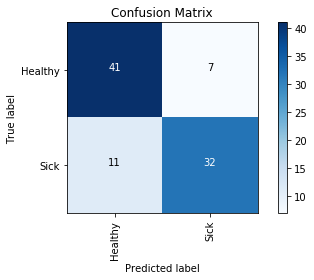

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_process_test, svm_prediction))
print("Precision:", metrics.precision_score(y_process_test, svm_prediction))
print("Recall:", metrics.recall_score(y_process_test, svm_prediction))
print("F1:", metrics.f1_score(y_process_test, svm_prediction))
print("Confusion Matrix: \n")
draw_confusion_matrix(y_process_test, svm_prediction, ['Healthy', 'Sick'])

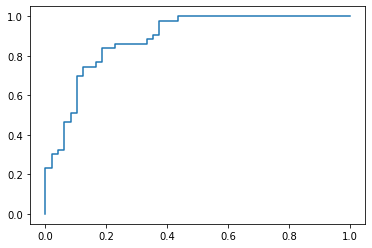

In [ ]:
fpr_svm, tpr_svm, threshholds = metrics.roc_curve(y_process_test, svm_score[:, 1], pos_label = 1)
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm)

### Question 3.1.9 Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

Using a linear kernel slightly weakened the performance of our model across all metrics. This is because changing the kernel changes how our SVM classifies when imposing our data points onto a graph (use of a line in linear vs more abstract radial shapes in rbf, the default). Because of the accuracy of a linear kernel, we deduce that our dataset and prediction problem (sickness)is more comparable to a non-linear problem than a linear problem. 

This is slightly worse for us as it means that we don't need to rely on a more computation-heavy RBF svm model that avoids the possibility of generalization, which is easier to do when our kernel is linear.

### Logistic Regression

Knowing that we're dealing with a linearly configured dataset, let's now try another classifier that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Question 3.2.1 Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. For this initial model set the solver = 'sag' and max_iter= 10). Report on the same four metrics as the SVM and graph the resulting ROC curve.

In [ ]:
# Logistic Regression
log_model = LogisticRegression(solver = 'sag', max_iter = 10)
log_model.fit(x_process_train, y_process_train)
log_prediction = log_model.predict(x_process_test)
log_score = log_model.predict_proba(x_process_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy: 0.8351648351648352
Precision: 0.85
Recall: 0.7906976744186046
F1: 0.8192771084337349
Confusion Matrix: 



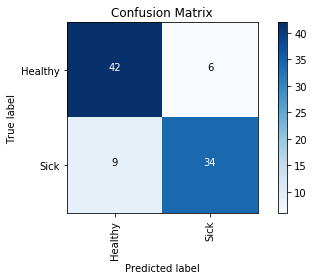

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_process_test, log_prediction))
print("Precision:", metrics.precision_score(y_process_test, log_prediction))
print("Recall:", metrics.recall_score(y_process_test, log_prediction))
print("F1:", metrics.f1_score(y_process_test, log_prediction))
print("Confusion Matrix: \n")
draw_confusion_matrix(y_process_test, log_prediction, ['Healthy', 'Sick'])

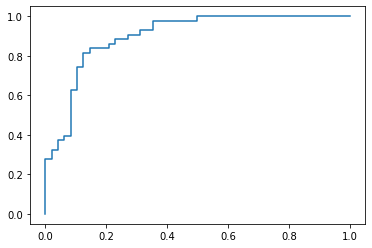

In [ ]:
fpr_svm, tpr_svm, threshholds = metrics.roc_curve(y_process_test, log_score[:, 1], pos_label = 1)
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm)

### Question 3.2.2 Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [ ]:
# Logistic Regression
log_model = LogisticRegression(solver = 'sag', max_iter = 1000)
log_model.fit(x_process_train, y_process_train)
log_prediction = log_model.predict(x_process_test)
log_score = log_model.predict_proba(x_process_test)

Accuracy: 0.8131868131868132
Precision: 0.8421052631578947
Recall: 0.7441860465116279
F1: 0.7901234567901234
Confusion Matrix: 



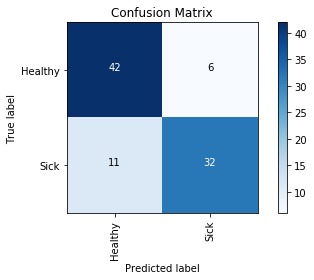

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_process_test, log_prediction))
print("Precision:", metrics.precision_score(y_process_test, log_prediction))
print("Recall:", metrics.recall_score(y_process_test, log_prediction))
print("F1:", metrics.f1_score(y_process_test, log_prediction))
print("Confusion Matrix: \n")
draw_confusion_matrix(y_process_test, log_prediction, ['Healthy', 'Sick'])

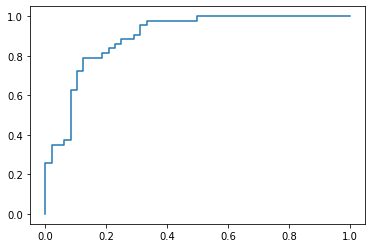

In [ ]:
fpr_svm, tpr_svm, threshholds = metrics.roc_curve(y_process_test, log_score[:, 1], pos_label = 1)
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm)

### Question 3.2.3 Explain what you changed, and why that produced an improved outcome. 

I replaced the maximum number of iterations for convergence with a larger number. Since the result was previously capped at the default, there simply weren't enough iterations that could be run in order to reach the point of converegence. Increasing the allowable number of iterations allows for a convergence point to be reached, improving results.

We specify improved results meaning that convergence was reached so that error is no longer thrown. In terms of accuracy measurements, it performs identically to a smaller iteration cap.

### Question 3.2.4 Rerun your logistic classifier, but modify the penalty = 'none', solver='sag' and again report the results.

In [ ]:
# Logistic Regression
log_model = LogisticRegression(penalty = 'none', solver = 'sag', max_iter = 1000)
log_model.fit(x_process_train, y_process_train)
log_prediction = log_model.predict(x_process_test)
log_score = log_model.predict_proba(x_process_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy: 0.7912087912087912
Precision: 0.8157894736842105
Recall: 0.7209302325581395
F1: 0.765432098765432
Confusion Matrix: 



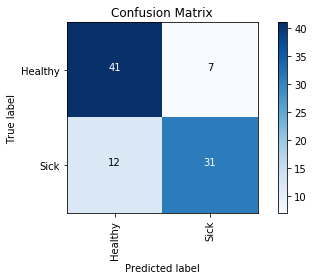

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_process_test, log_prediction))
print("Precision:", metrics.precision_score(y_process_test, log_prediction))
print("Recall:", metrics.recall_score(y_process_test, log_prediction))
print("F1:", metrics.f1_score(y_process_test, log_prediction))
print("Confusion Matrix: \n")
draw_confusion_matrix(y_process_test, log_prediction, ['Healthy', 'Sick'])

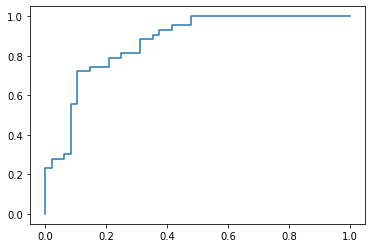

In [ ]:
fpr_svm, tpr_svm, threshholds = metrics.roc_curve(y_process_test, log_score[:, 1], pos_label = 1)
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm)

### Question 3.2.5 Explain what what the penalty parameter is doing in this function, what the solver method is, and why this combination likely produced a more optimal outcome. 

The penalty parameter essentially invokes a penalty on a more complex classification algorithm, encouraging normalization/regularization of our data when certain weights used in our model are given too much emphasis. 

Although this might be good in extremely unbalanced dataset to reduce noise detection, when data is processed such that it's sufficiently "balanced," penalties become unnecessary and harmful to accuracy.

Also our solver method is "sag" and a solver itself is used for optimization of a model. Sag just happens to be specialized towards large datasets and additionally happens to be compatible when penalty is set to none, enabling our improved outcome, which should've happened and did happen the first time I ran this code before restarting the runtime. I believe that rerunning and resampling my data just changed the performance slightly.

### Question 3.2.6 Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Even though both want to find the same linear decision boundary through which they make classification decisions, both make different calculations towards this goal. and our suited for different things. Logistic regression appears to have more features suited towards the reduction of noise and maximization of balance, which suggests to me that it's more ideal for imbalanced/real-world datasets. 

Also, SVM is better suited towards small counts of features while logistic works better with greater numbers of features. SVM is also superior for generalizing models due to a lack of penalization/reduction of noise and imbalance.

### Clustering Approaches 

Let us now try a different approach to classification using a clustering algorithm. Specifically, we're going to be using K-Nearest Neighbor, one of the most popular clustering approaches. 

### K-Nearest Neighbor  

### Question 3.3.1 Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [ ]:
# k-Nearest Neighbors algorithm
knn_model = KNeighborsClassifier()
knn_model.fit(x_process_train, y_process_train)
knn_prediction = knn_model.predict(x_process_test)
knn_real = knn_model.predict_proba(x_process_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_process_test, knn_prediction))

Accuracy: 0.7582417582417582


### Question 3.3.2 For clustering algorithms, we use different measures to determine the effectiveness of the model. Specifically here, we're interested in the Homogeneity Score, Completeness Score, V-Measure, Adjusted Rand Score, and Adjusted Mutual Information. Calculate each score (hint review the SKlearn Metrics Clustering documentation for how to implement).

Homogeneity: 0.20100293100959304
Completeness: 0.20100293100959304
V-Measure: 0.20100293100959304
Adjusted Rand: 0.2585599086256054
Adjusted Mutual: 0.19449531318408925
Confusion Matrix: 



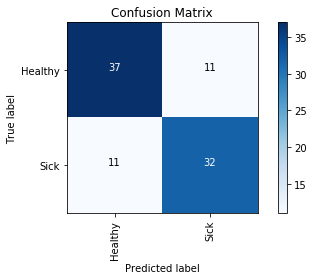

In [ ]:
print("Homogeneity:", metrics.homogeneity_score(y_process_test, knn_prediction))
print("Completeness:", metrics.completeness_score(y_process_test, knn_prediction))
print("V-Measure:", metrics.v_measure_score(y_process_test, knn_prediction))
print("Adjusted Rand:", metrics.adjusted_rand_score(y_process_test, knn_prediction))
print("Adjusted Mutual:", metrics.adjusted_mutual_info_score(y_process_test, knn_prediction))
print("Confusion Matrix: \n")
draw_confusion_matrix(y_process_test, knn_prediction, ['Healthy', 'Sick'])

### Question 3.3.3 Explain what each score means and interpret the results for this particular model. 

KNN, based off our results using new clustering measuring metrics, performs far below our logistic and SVM classification models. This is because KNN is a clustering model first and foremost and thus the measurements seen above are a measure of uniformity in clustering, which can be extrapolated towards prediction accuracy.

Homogeneity is equivalent to Precision and is a direct representation of clustering uniformity.

Completeness indicates the depth of a certain cluster in terms of how well is has properly clustered from some metric/class (equivalent to Recall in terms of how it tracks false negatives).

V-Measure averages completeness and homogeneity like an F1 score. It's not a good proxy for F1 scores in terms of applicability towards imbalanced datasets, as that role is served by the Mutual score.

Adjusted Rand and Mutual are both unique to clustering algorithms like KNN. Adjusted Rand is the equivalent to an accuracy score but with greater gravitation/impact when it comes to numbers of clusters and randomness. Meanwhile, the mutual score is like rand but calculating differently. In a sense, the relationship between these two variables are like Accuracy and F1, rand being suitable for larger equal clusters and mutual better for imbalanced ones.



As we're beginning to see, the input parameters for your model can dramatically impact the performance of the model. How do you know which settings to choose? Studying the models and studying your datasets are critical as they can help you anticipate which models and settings are likely to produce optimal results. However sometimes that isn't enough, and a brute force method is necessary to determine which parameters to use. For this next question we'll attempt to optimize a parameter using a brute force approach. 

### Question 3.3.4 Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 10, 20, 50, and 100. Run your model for each value and report the 6 measures (5 clustering specific plus accuracy) for each. Report on which n value produces the best accuracy and V-Measure. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [ ]:
num_neighbors = [1, 2, 3, 5, 10, 20, 50, 100]
for i in num_neighbors:
  # k-Nearest Neighbors algorithm
  print("n_neighbors:", i)
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(x_process_train, y_process_train)
  knn_prediction = knn_model.predict(x_process_test)
  knn_real = knn_model.predict_proba(x_process_test)
  print("Accuracy:", metrics.homogeneity_score(y_process_test, knn_prediction))
  print("Completeness:", metrics.completeness_score(y_process_test, knn_prediction))
  print("V Measure:", metrics.v_measure_score(y_process_test, knn_prediction))
  print("Adj Rand:", metrics.adjusted_rand_score(y_process_test, knn_prediction))
  print("Adj Mutual:", metrics.adjusted_mutual_info_score(y_process_test, knn_prediction))

n_neighbors: 1
Accuracy: 0.17792411581643294
Completeness: 0.17943232997088118
V Measure: 0.17867504020314945
Adj Rand: 0.21467519642780475
Adj Mutual: 0.17195522785540418
n_neighbors: 2
Accuracy: 0.20208392659002306
Completeness: 0.2068824956341954
V Measure: 0.20445505933286726
Adj Rand: 0.2587524710397363
Adj Mutual: 0.19789375612667137
n_neighbors: 3
Accuracy: 0.17050394636107113
Completeness: 0.17026595876185316
V Measure: 0.17038486945832346
Adj Rand: 0.21458864414809636
Adj Mutual: 0.16363294278926674
n_neighbors: 5
Accuracy: 0.20100293100959304
Completeness: 0.20100293100959304
V Measure: 0.20100293100959304
Adj Rand: 0.2585599086256054
Adj Mutual: 0.19449531318408925
n_neighbors: 10
Accuracy: 0.28094946431696816
Completeness: 0.28233267279666796
V Measure: 0.2816393702376524
Adj Rand: 0.3582354435543025
Adj Mutual: 0.27577307936545153
n_neighbors: 20
Accuracy: 0.2594860661141867
Completeness: 0.26168565865395954
V Measure: 0.260581220720768
Adj Rand: 0.3318878536773861
Adj Mut

Our most optimal neighbor count, pushing V and Accuracy scores to their maximum posssible value, is 10. with an accuracy of .281 and v measurement of .282.

### Question 3.3.5 When are clustering algorithms most effective, and what do you think  explains the comparative results we achieved?  

Clustering algorithms are typically less suited for classification problems like the one presented in project 2 and more suited towards unlabeled  (unsupervised) problems as clustering is more suited towards establishing similarities between data points before label assignment. 

The reason for the results we achieved, assuming comparative refers to how horribly KNN performed when compared to logistic regression and SVM is because of the core differences between clustering and classification models. Classification models (which are supervised) benefit and ultimately rely on the fact that labeled datasets are used, enabling the maximum possible accuracy in prediction of a trained model. With clustering, training/testing is not as valued because the clustering model depends more on finding pre-existing similarities between inputs before creating outputs to respond to these similiarities.
